In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data source: https://www.kaggle.com/datasets/umerhaddii/google-stock-data-2024

In [171]:
df_google = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/GOOGL_2004-08-01_2024-12-18.csv', 
                        header=0)

In [172]:
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [173]:
df_google.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [174]:
df_google['Date'] = pd.to_datetime(df_google['Date'])

In [175]:
df_google['Year'] = df_google['Date'].dt.year

In [176]:
df_google.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Year                  int64
dtype: object

In [177]:
df_google.set_index('Date', inplace=True)
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,2004
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,2004
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,2004
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,2004
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,2004


In [178]:
df_google.drop('Adj Close', axis=1, inplace=True)

df_google['Open'] = df_google['Open'].round(2)
df_google['High'] = df_google['High'].round(2)
df_google['Low'] = df_google['Low'].round(2)
df_google['Close'] = df_google['Close'].round(2)

df_google.head()

,Open,High,Low,Close,Volume,Year
Date,,,,,,
2004-08-19,2.50,2.60,2.40,2.51,893181924,2004
2004-08-20,2.53,2.73,2.52,2.71,456686856,2004
2004-08-23,2.77,2.84,2.73,2.74,365122512,2004
2004-08-24,2.78,2.79,2.59,2.62,304946748,2004
2004-08-25,2.63,2.70,2.60,2.65,183772044,2004


In [179]:
df_google['Price Change'] = df_google['Close'] - df_google['Open']
df_google.head()

,Open,High,Low,Close,Volume,Year,Price Change
Date,,,,,,,
2004-08-19,2.50,2.60,2.40,2.51,893181924,2004,0.01
2004-08-20,2.53,2.73,2.52,2.71,456686856,2004,0.18
2004-08-23,2.77,2.84,2.73,2.74,365122512,2004,-0.03
2004-08-24,2.78,2.79,2.59,2.62,304946748,2004,-0.16
2004-08-25,2.63,2.70,2.60,2.65,183772044,2004,0.02


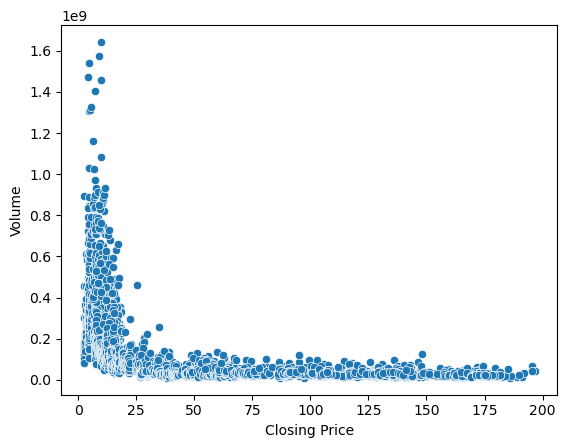

In [180]:
sns.scatterplot(data=df_google, x='Close', y='Volume')
plt.xlabel('Closing Price')
plt.show()

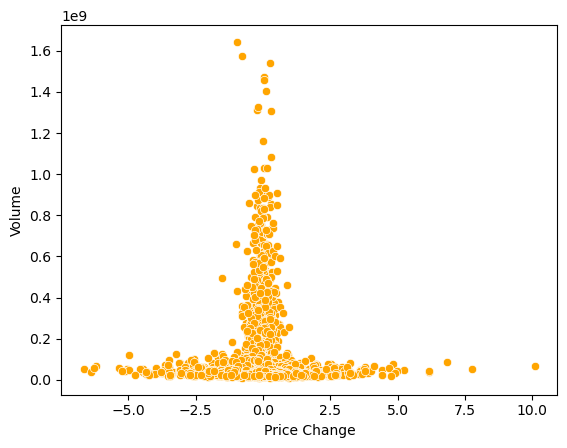

In [181]:
sns.scatterplot(data=df_google, x='Price Change', y='Volume', color='Orange')
plt.show()

In [182]:
df_google['ln(Volume)'] = np.log(df_google['Volume'])
df_google.head()

,Open,High,Low,Close,Volume,Year,Price Change,ln(Volume)
Date,,,,,,,,
2004-08-19,2.50,2.60,2.40,2.51,893181924,2004,0.01,20.610301
2004-08-20,2.53,2.73,2.52,2.71,456686856,2004,0.18,19.939508
2004-08-23,2.77,2.84,2.73,2.74,365122512,2004,-0.03,19.715744
2004-08-24,2.78,2.79,2.59,2.62,304946748,2004,-0.16,19.535648
2004-08-25,2.63,2.70,2.60,2.65,183772044,2004,0.02,19.029207


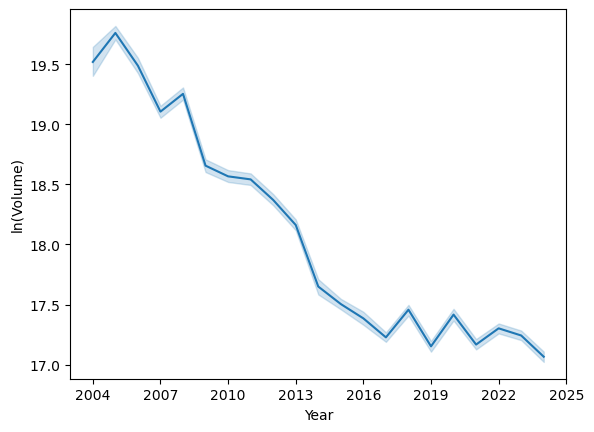

In [183]:
sns.lineplot(x='Year', y='ln(Volume)', data = df_google)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

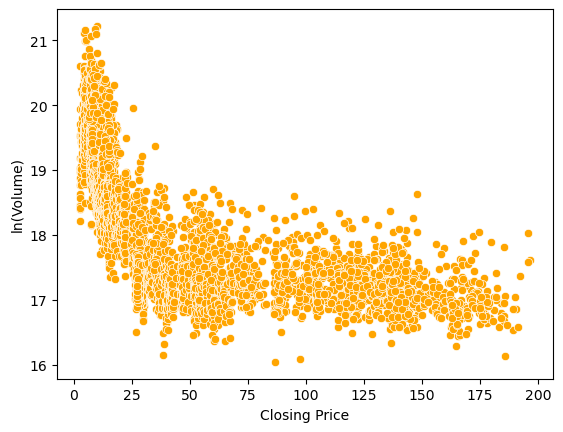

In [184]:
sns.scatterplot(x='Close', y='ln(Volume)', data = df_google, color = 'Orange')
plt.xlabel('Closing Price')
plt.show()

In [185]:
df_google['Price Direction'] = np.where(df_google['Price Change'] > 0, 'Price Increase', 
                                      np.where(df_google['Price Change'] < 0, 'Price Decrease', 'No Change'))
df_google.head()

,Open,High,Low,Close,Volume,Year,Price Change,ln(Volume),Price Direction
Date,,,,,,,,,
2004-08-19,2.50,2.60,2.40,2.51,893181924,2004,0.01,20.610301,Price Increase
2004-08-20,2.53,2.73,2.52,2.71,456686856,2004,0.18,19.939508,Price Increase
2004-08-23,2.77,2.84,2.73,2.74,365122512,2004,-0.03,19.715744,Price Decrease
2004-08-24,2.78,2.79,2.59,2.62,304946748,2004,-0.16,19.535648,Price Decrease
2004-08-25,2.63,2.70,2.60,2.65,183772044,2004,0.02,19.029207,Price Increase


In [186]:
counts = df_google['Price Direction'].value_counts()
print(counts)

Price Increase    2521
Price Decrease    2476
No Change          121
Name: Price Direction, dtype: int64


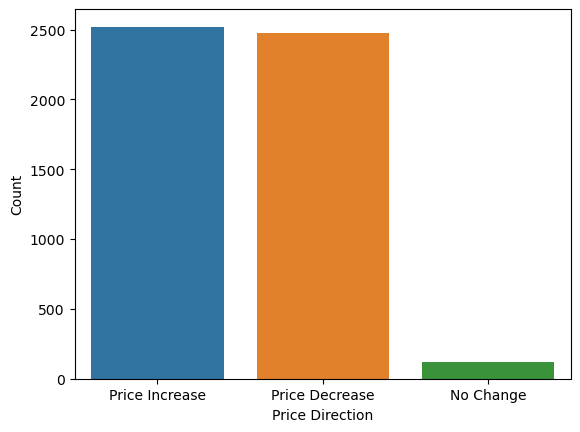

In [187]:
sns.countplot(data=df_google, x='Price Direction')
plt.ylabel('Count')
plt.show()

In [188]:
x = df_google[['Open', 'Close', 'High', 'Low']]
y = df_google['ln(Volume)']

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [190]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[ 0.95738016  0.95913654  0.95167296  0.96416991]
 [-0.11129857 -0.10349565 -0.11107929 -0.10314126]
 [-0.52897092 -0.52868037 -0.53200571 -0.52802345]
 ...
 [-0.7223174  -0.72380389 -0.7222488  -0.72159569]
 [-0.44723809 -0.44210529 -0.44634196 -0.44278063]
 [-0.42219093 -0.42958046 -0.42807863 -0.42457773]]


In [191]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [192]:
coeff_df_google = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_google

,Coefficient
Open,-0.007431
Close,-0.281264
High,14.695393
Low,-15.045290


In [193]:
y_pred = regressor.predict(x_test)

In [194]:
df_actual_vs_predicted_log_volume = pd.DataFrame({'Actual ln(Volume)': y_test, 'Predicted ln(Volume)': y_pred})
df_actual_vs_predicted_log_volume.head(10)

,Actual ln(Volume),Predicted ln(Volume)
Date,,
2004-10-19,19.707700,18.711749
2014-01-14,18.412696,18.333787
2011-12-23,17.877502,18.451474
2015-02-25,17.525075,18.365216
2009-08-24,18.400864,18.550943
2013-11-29,17.679693,18.251499
2022-04-25,17.646931,17.723624
2019-03-06,16.976842,17.714613
2015-11-25,16.977266,18.046300


In [195]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.554053648875372
Mean Squared Error: 0.46327122877881277
Root Mean Squared Error: 0.6806403079298292


In [196]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.5079648433263182


In [197]:
print('Intercept:', regressor.intercept_)

Intercept: 18.053042563650227
